# Lab 3 Network Centrality and Visualization with NetworkX
## Due: Midnight, October 2nd
In lab 3, we will introduce network centrality and visualization with NetworkX. The goal of the lab includes
1. **Load graph data**
2. **Use the visualization tool with different parameters**
3. **Calculate various network centrality and visualize the network with node size proportional to the centrality score**
3. **Find and visualize the shortest path and minimum spanning tree**


## Save Your Notebook! 
- Click on File (upper left corner), Select “Save” or press Ctrl+S.
- Important: You may loose your modification to a notebook if you do not Save it explicitly.
- Advice: Save often.  


## Submission
- Please follow the instructions and finish the exercises.
- After you finish the lab, please Click on File, Select “Download .ipynb”
- After download is complete, Click on File, Select “Print”, and and Choose ``Save as PDF''
- Submit both the Notebook file and the PDF File as your submission for Lab 3.

# 1. Preparation
Before we start to visualize the networks, we have to install the packages and prepare the network dataset.

# 1.1 Connect this Colab notebook with your Google Drive

In [1]:
# The following code will mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1.1. Install Packages
The plotting package matplotlib and complex graph package NetworkX should have been installed in Colab. If not, please run the following code cell to install them.

In [2]:
!pip install matplotlib
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1.2. Load Graph Data
Please download the file "undirected_weighted.edgelist" from Canvas. The file is the edgelist of a weighted graph. Each line is in the format of

*Source_Node, Target_Node, Edge_Weight*

Please **upload** the file to the folder DS420 in Google Drive.

We can load the graph directly from an edgelist with function read_edgelist. This link gives details of the function parameters and some examples: https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.readwrite.edgelist.read_edgelist.html

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
# load the network
undirected_G = nx.read_edgelist(path="/content/gdrive/My Drive/DS420/undirected_weighted.edgelist", data=(('weight',float),))

In [ ]:
# we can access the node set and edge set with the following functions
print('node list: {}'.format(undirected_G.nodes()))
print('edge list: {}'.format(undirected_G.edges(data = True)))

node list: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
edge list: [('1', '2', {'weight': 1.0}), ('1', '3', {'weight': 2.0}), ('1', '4', {'weight': 2.0}), ('1', '5', {'weight': 2.0}), ('1', '6', {'weight': 2.0}), ('1', '12', {'weight': 2.0}), ('1', '15', {'weight': 1.0}), ('1', '16', {'weight': 1.0}), ('2', '3', {'weight': 2.0}), ('2', '5', {'weight': 2.0}), ('2', '6', {'weight': 2.0}), ('2', '9', {'weight': 2.0}), ('2', '10', {'weight': 2.0}), ('2', '15', {'weight': 1.0}), ('2', '16', {'weight': 1.0}), ('3', '4', {'weight': 1.0}), ('3', '6', {'weight': 1.0}), ('3', '7', {'weight': 1.0}), ('3', '8', {'weight': 1.0}), ('4', '8', {'weight': 1.0}), ('5', '7', {'weight': 1.0}), ('5', '9', {'weight': 1.0}), ('5', '14', {'weight': 1.0}), ('5', '15', {'weight': 2.0}), ('5', '16', {'weight': 2.0}), ('6', '7', {'weight': 1.0}), ('6', '8', {'weight': 1.0}), ('6', '9', {'weight': 2.0}), ('6', '11', {'weight': 1.0}), ('6', '12', {'weight': 1.0}), ('6', '1

# 2. Visualization
In this section, we will learn how to use the NetworkX package for different graph layout and visualize the plot with matplotlib
# 2.1. Different Layouts
Firstly, we will try different layouts of network visualization. Currently, there are around 10 diferent layout options we have in NetworkX. The document for NetworkX layout function is available at https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout. You can click the funciton name in the document, which will lead you to the detailed descrioption of the function. Let's show some of the layout

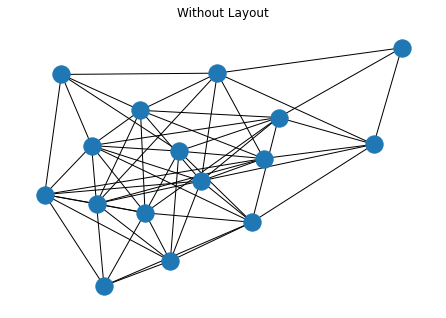

In [8]:
%matplotlib inline
nx.draw(undirected_G) # without layout, spring layout will be used, The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects
plt.title('Without Layout')
plt.show()

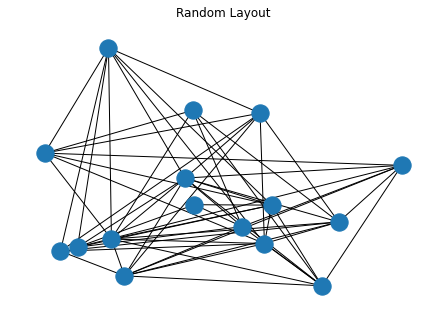

In [9]:
pos_random = nx.random_layout(undirected_G) #using random layout
nx.draw(undirected_G, pos_random)
plt.title('Random Layout')
plt.show()

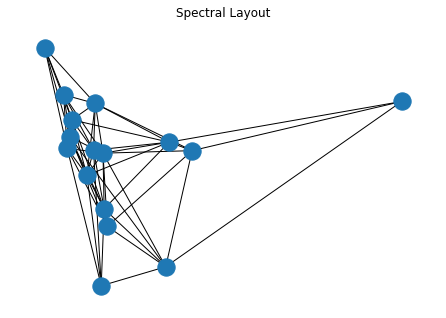

In [10]:
pos_spectral = nx.spectral_layout(undirected_G) #using spectral layout
nx.draw(undirected_G, pos_spectral)
plt.title('Spectral Layout')
plt.show()

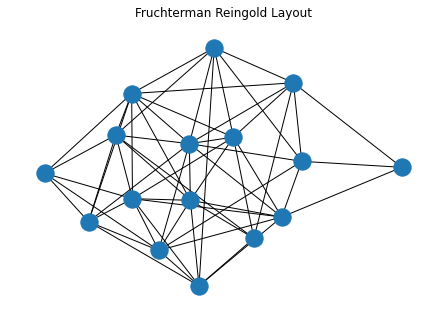

In [11]:
pos_fruchterman = nx.fruchterman_reingold_layout(undirected_G) #using fruchterman reingold layout, the same as spring layout
nx.draw(undirected_G, pos_fruchterman)
plt.title('Fruchterman Reingold Layout')
plt.show()

## <font color='green'>Exercise 1</font>
visualize the graph with **circular layout**, you can call pos_circular=nx.circular_layout(undirected_G) to get the circular layout, then visualize the graph

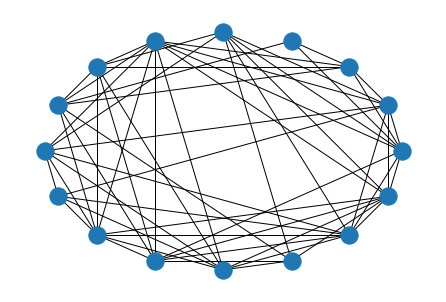

In [ ]:
# TODO
pos_circular= ?????????????????
nx.draw(undirected_G, pos_circular)

# 2.2. Usage of the Visualization Tools
In the above cells, we used the default setting of network draw functions. We can chhange the node/edge color/width by setting the parameters. Next, we will give a basic introduction on how to do these. 

draw_networkx_nodes: https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html#networkx.drawing.nx_pylab.draw_networkx_nodes

draw_networkx_edges: https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html

draw_networkx_edge_labels: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html

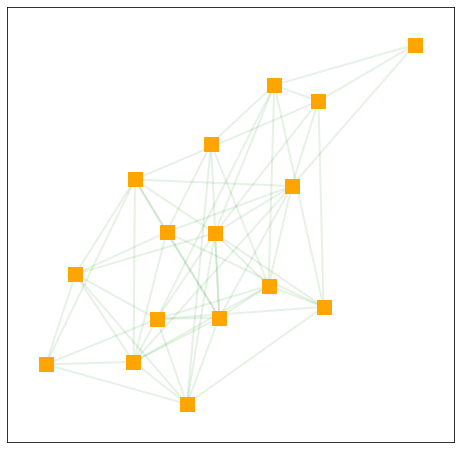

In [12]:
# plot the nodes with node_size = 200, node_color as orange, node_shape as square
plt.figure(figsize=(8,8))
pos_fruchterman = nx.fruchterman_reingold_layout(undirected_G) 
nx.draw_networkx_nodes(undirected_G, pos_fruchterman, node_size=200, node_color='orange', node_shape='s')
# plot the edges with width = 2 and edge_color='green'
nx.draw_networkx_edges(undirected_G, pos_fruchterman, width=2, edge_color='green', alpha=0.1) #alpha is the transparency

{('1', '2'): Text(-0.00724647792792385, 0.2043434722814091, '1.0'),
 ('1', '3'): Text(0.4512800882561475, 0.3443817838244394, '2.0'),
 ('1', '4'): Text(0.6922310520484078, 0.4453106505693532, '2.0'),
 ('1', '5'): Text(0.07168498089173153, 0.11014266438152359, '2.0'),
 ('1', '6'): Text(0.1922996006265184, 0.10845799827166784, '2.0'),
 ('1', '12'): Text(0.3267013116841686, 0.014595909845923807, '2.0'),
 ('1', '15'): Text(-0.011026116367678057, -0.12176957049305195, '1.0'),
 ('1', '16'): Text(0.20343111754392998, -0.04244114520812653, '1.0'),
 ('2', '3'): Text(0.05957150623140789, 0.3561576087341335, '2.0'),
 ('2', '5'): Text(-0.3200236011330081, 0.12191848929121764, '2.0'),
 ('2', '6'): Text(-0.1994089813982212, 0.12023382318136189, '2.0'),
 ('2', '9'): Text(-0.5479101570787877, 0.04691173080620852, '2.0'),
 ('2', '10'): Text(-0.621475134703292, -0.11423499846165448, '2.0'),
 ('2', '15'): Text(-0.40273469839241766, -0.10999374558335791, '1.0'),
 ('2', '16'): Text(-0.18827746448080962, -0

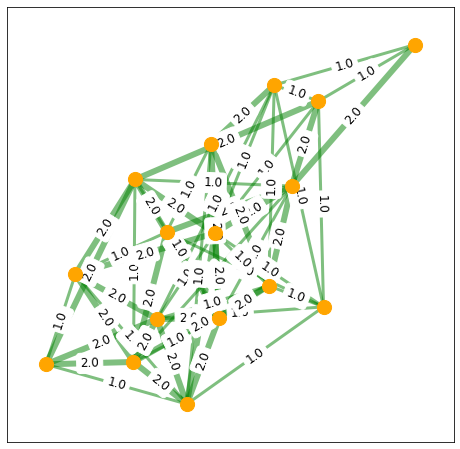

In [13]:
plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(undirected_G, pos_fruchterman, node_size=200, node_color='orange')

# weight of the edge as the width of the edge
weights = [undirected_G[u][v]['weight']*3 for u,v in undirected_G.edges()]
nx.draw_networkx_edges(undirected_G, pos_fruchterman, width=weights,alpha=0.5, edge_color='green')

# label the edge with weight
edge_labels = nx.get_edge_attributes(undirected_G,'weight')
nx.draw_networkx_edge_labels(undirected_G,pos_fruchterman,edge_labels=edge_labels, font_size=12)



{'1': Text(0.38446210409681575, 0.19256764737171506, '1'),
 '2': Text(-0.39895505995266345, 0.21611929719110315, '2'),
 '3': Text(0.5180980724154792, 0.4961959202771638, '3'),
 '4': Text(1.0, 0.6980536537669914, '4'),
 '5': Text(-0.2410921423133527, 0.027717681391332138, '5'),
 '6': Text(0.00013709715622106175, 0.02434834917162062, '6'),
 '7': Text(0.5435064038226499, -0.23919092119551313, '7'),
 '8': Text(0.29738207967970004, 0.553603255379339, '8'),
 '9': Text(-0.696865254204912, -0.1222958355786861, '9'),
 '10': Text(-0.8439952094539205, -0.4445892941144121, '10'),
 '11': Text(-0.28906827316035427, -0.2828619694918206, '11'),
 '12': Text(0.2689405192715215, -0.16337582767986744, '12'),
 '13': Text(-0.13957964989144403, -0.5865708436632537, '13'),
 '14': Text(-0.01885648162461325, 0.3438356133200766, '14'),
 '15': Text(-0.40651433683217186, -0.43610678835781896, '15'),
 '16': Text(0.022400130991044206, -0.2774499377879681, '16')}

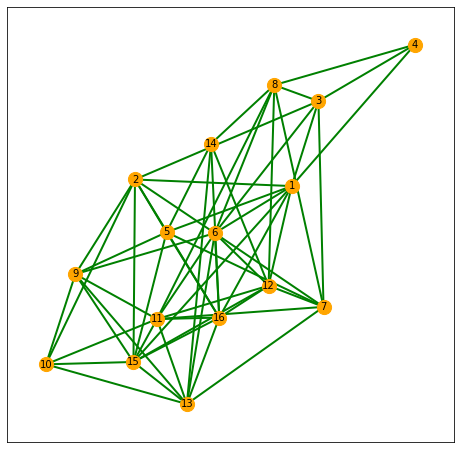

In [14]:
# add the node label to the figure
plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(undirected_G, pos_fruchterman, node_size=200, node_color='orange')
nx.draw_networkx_edges(undirected_G, pos_fruchterman, width=2, edge_color='green', alpha=1)
nx.draw_networkx_labels(undirected_G, pos_fruchterman, font_size=10)

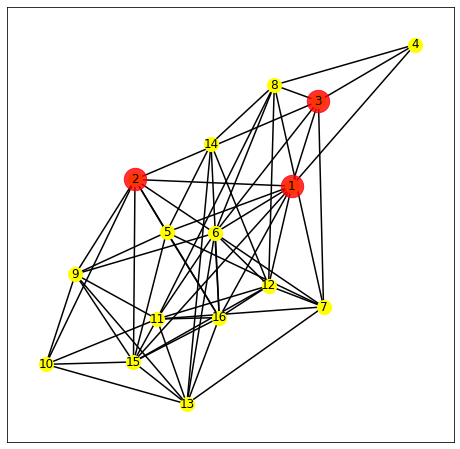

In [15]:
plt.figure(figsize=(8,8))
#change the nodes color to yellow
nx.draw_networkx_nodes(undirected_G,pos_fruchterman,node_size=200, node_color='yellow') 
#increase the width of the edges 
nx.draw_networkx_edges(undirected_G,pos_fruchterman,width=1.5,edge_color='black',alpha=1)
#increase the font size
nx.draw_networkx_labels(undirected_G,pos_fruchterman,font_size=12)
#change the color of the selected nodes
nx.draw_networkx_nodes(undirected_G,pos_fruchterman,nodelist=['1','2','3'], node_color='r', node_size=500, alpha=0.8)

## <font color='green'>Exercise 2</font>
Follow the above example, visualize the undirected graph with 
- node_size as 200, node_color as green
- edge_color as gray, width as 2
- for node 1, 2, 3, 4, set their node color to red, nodies size to 600
- include the node label and set the font_size as 15
- use circular_layout

In [ ]:
# TODO please fill in the missing part
nx.draw_networkx_nodes(undirected_G, pos_circular, node_size=??, node_color=??)
nx.draw_networkx_edges(undirected_G, pos_circular, width=??, edge_color= ??, alpha=1)
nx.draw_networkx_labels(undirected_G,pos_circular, font_size=??)
nx.draw_networkx_nodes(undirected_G, pos_circular, nodelist=????, node_color='r', node_size=600, alpha=0.8)

We can also change the property of the selected edges. In the example below, we change the edge ('7','8'),('2','9') with width=8,alpha=0.5,edge_color='r'

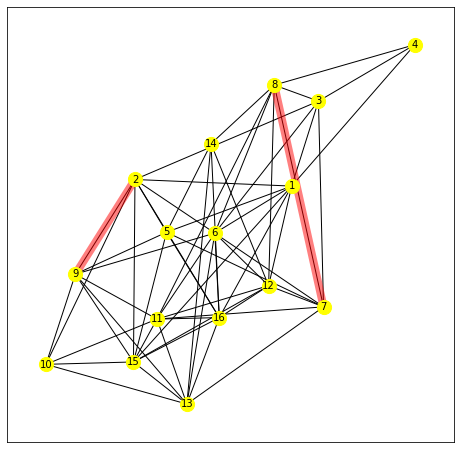

In [16]:
#change the property of the selected edges
plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(undirected_G, pos_fruchterman, node_size=200, node_color='yellow')
nx.draw_networkx_edges(undirected_G, pos_fruchterman,width=1, edge_color='black', alpha=1)
nx.draw_networkx_labels(undirected_G, pos_fruchterman, font_size=10)
nx.draw_networkx_edges(undirected_G, pos_fruchterman,edgelist=[('7','8'),('2','9')], width=8,alpha=0.5, edge_color='r')

## <font color='green'>Exercise 3</font>
Following the example in the above cell, please highlight the **edge ('1','9') with color as blue and width as 10**

In [ ]:
# TODO: please finish exercise 3

# 2.3. Find Inluential Nodes with Network Centrality and Visualize Them

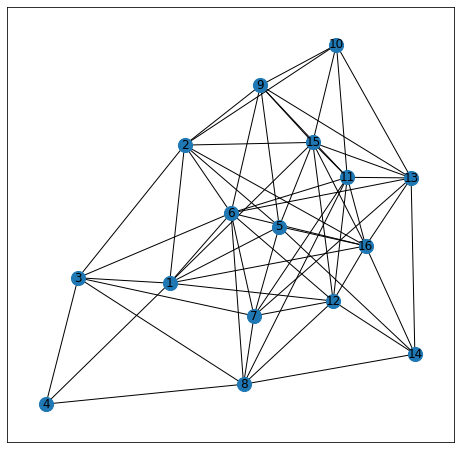

In [17]:
plt.figure(figsize=(8,8))
pos = nx.fruchterman_reingold_layout(undirected_G)
nx.draw_networkx(undirected_G,pos,node_size=200,font_size=12)

## 2.3.1. Visualize the network with degree centrality

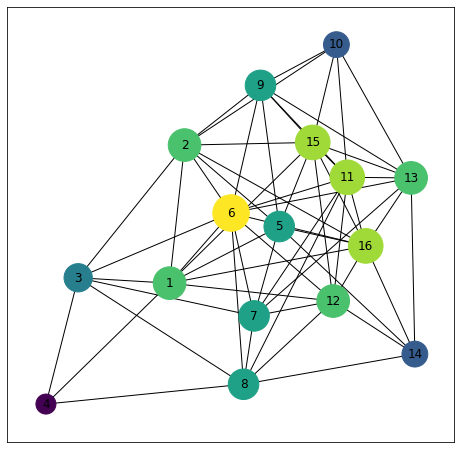

In [18]:
plt.figure(figsize=(8,8))
node_degree = nx.degree_centrality(undirected_G)  # get the degree of the nodes
nodesize=[node_degree[node]*2000 for node in undirected_G.nodes]  # multiply node degree by 1000, otherwise, the visualized nodes will be too small
nx.draw_networkx(undirected_G, pos, node_size=nodesize, font_size=12, node_color=nodesize)  # set node_size to nodesie and node_color to nodesie

## 2.3.2. Visualize the network with closeness centrality

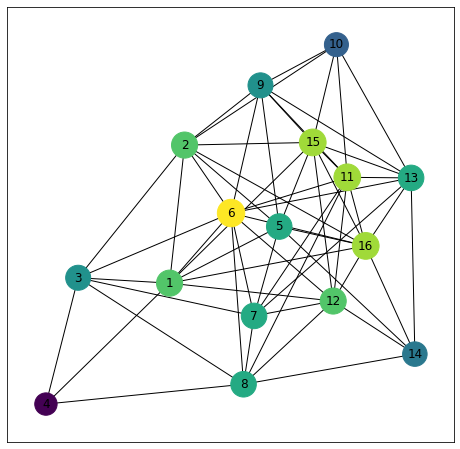

In [19]:
plt.figure(figsize=(8,8))
closeness_centrality = nx.closeness_centrality(undirected_G)  # calcualte closeness centrality`
nodesize = [closeness_centrality[node]*1000 for node in undirected_G.nodes] 
nx.draw_networkx(undirected_G, pos, with_labels=True, node_size=nodesize, font_size=12, node_color=nodesize)

## 2.3.3. Visualize the network with harmonic centrality

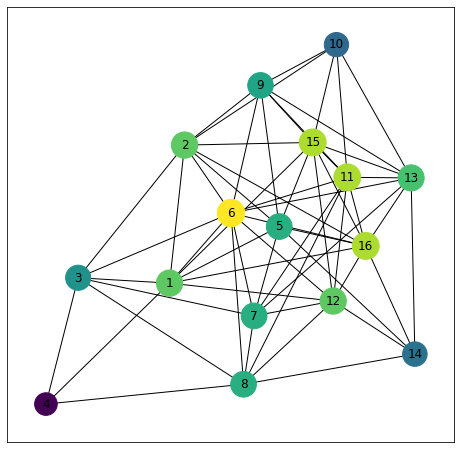

In [20]:
plt.figure(figsize=(8,8))
harmonic_centrality = nx.harmonic_centrality(undirected_G)  # calculate harmonic centrality
nodesize = [harmonic_centrality[node]*60 for node in undirected_G.nodes]
nx.draw_networkx(undirected_G, pos, with_labels=True, node_size=nodesize, font_size=12, node_color=nodesize)

## <font color='green'>Exercise 4</font> 
Follow the above examples, please calcualte katz centrality and visualize the graph with node size reflecting katz centrality. You'll need to scale the katz centrality score for better visualization

In [ ]:
# TODO: please finish exercise 4

# 3. Visualize the Shortest Path and Minimum Spanning Tree

# 3.1. Shortest Path for Selected Nodes 
In this example, we show how to find and visualize the shortest path for two given nodes

In [21]:
#select two nodes 
source = '8'
sink = '16'
#Get the path_node_list from the dijkstra algorithm
length, path_node_list = nx.single_source_dijkstra(undirected_G, source, sink)
print('The shortest path length from node {} to node {} is {}. The path is {}'.format(source, sink, length, path_node_list))

The shortest path length from node 8 to node 16 is 3.0. The path is ['8', '6', '16']


In [22]:
# convert the node list of the shortest path to edge list
path =[]
for i in range(len(path_node_list)-1):
    path.append((path_node_list[i], path_node_list[i+1]))
print(path)

[('8', '6'), ('6', '16')]


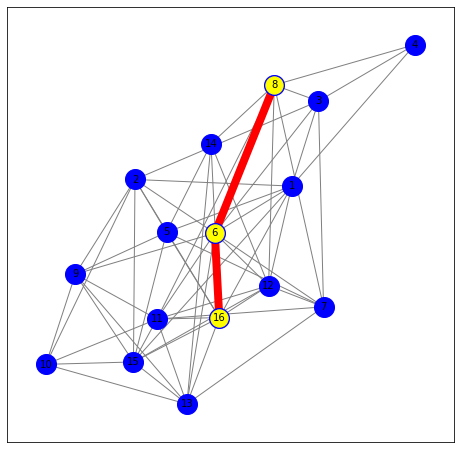

In [23]:
# now we can visulize the path with by highlighting edges and nodes in the path list
plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(undirected_G, pos_fruchterman, node_size=400, node_color='blue')
nx.draw_networkx_edges(undirected_G, pos_fruchterman, width=1, edge_color='gray', alpha=1)
nx.draw_networkx_labels(undirected_G, pos_fruchterman, font_size=10)
nx.draw_networkx_edges(undirected_G, pos_fruchterman, edgelist=path, width=8, alpha=1, edge_color='red')
nx.draw_networkx_nodes(undirected_G, pos_fruchterman, nodelist=path_node_list, node_color='yellow')

## <font color='green'>Exercise 5</font>
Follow the example in 3.1, find and visulaize the shortest path from node 1 to node 9

In [ ]:
# TODO: 

# 3.1. Minimum Spanning Tree
In this example, we show how to find and visualize the minimum spanning tree

### Find and visualize the minimum spanning tree of undirected_G

In [24]:
# get the minumum spanning tree
T=nx.minimum_spanning_tree(undirected_G)

In [25]:
# The edges of the trees can be retrieved as
print(T.edges)

[('1', '2'), ('1', '15'), ('1', '16'), ('1', '3'), ('3', '4'), ('3', '6'), ('3', '7'), ('3', '8'), ('5', '7'), ('5', '9'), ('5', '14'), ('6', '11'), ('6', '12'), ('7', '13'), ('9', '10')]


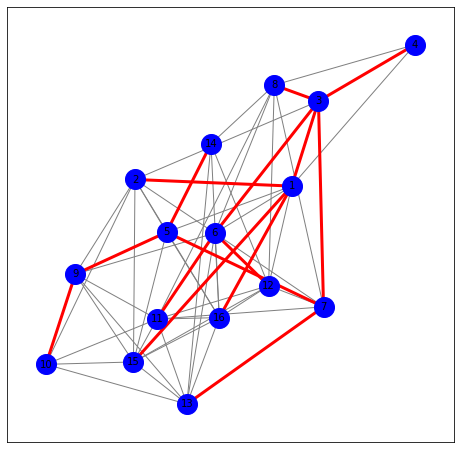

In [26]:
# visulize the MST
plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(undirected_G, pos_fruchterman, node_size=400, node_color='blue')
nx.draw_networkx_edges(undirected_G, pos_fruchterman, width=1, edge_color='gray', alpha=1)
nx.draw_networkx_labels(undirected_G, pos_fruchterman, font_size=10)
nx.draw_networkx_edges(undirected_G, pos_fruchterman, edgelist=T.edges, width=3, alpha=1, edge_color='red')



### Calculate the weight of the minimum spanning tree

In [27]:
# Calculate the weight of the minimum spanning tree
MSTweight = 0
edgelist = list(T.edges)
for edge in edgelist:
    MSTweight += undirected_G.get_edge_data(edge[0], edge[1])['weight']
print('The weight of MST is: ' + str(MSTweight) )

The weight of MST is: 16.0


# <font color='green'>Exercise 6</font>
For the graph below, please find and visualize the minimum spanning tree, and report the weight of the minimum spanning tree

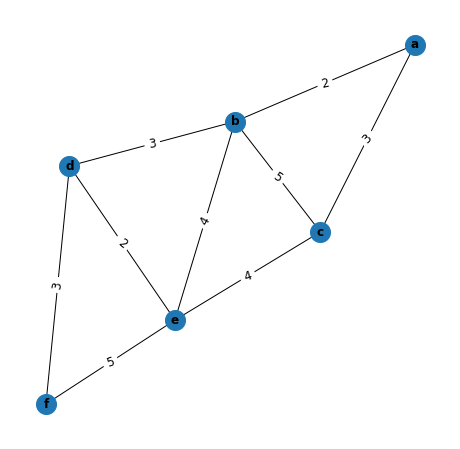

In [ ]:
# load graph
G = nx.Graph()

G.add_edge('a', 'b', weight=2)
G.add_edge('a', 'c', weight=3)
G.add_edge('b', 'c', weight=5)
G.add_edge('b', 'd', weight=3)
G.add_edge('b', 'e', weight=4)
G.add_edge('c', 'e', weight=4)
G.add_edge('d', 'e', weight=2)
G.add_edge('d', 'f', weight=3)
G.add_edge('e', 'f', weight=5)

# visualize the graph
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_size=12)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=400, font_size=12)
plt.show(block=False)


In [ ]:
plt.figure(figsize=(8,8))

# find the minimum spanning tree of G
T = nx.minimum_spanning_tree(G=????????????)

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=400, font_size=12)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_size=12)
nx.draw_networkx_edges(G, pos=pos, edgelist=T.edges, width=6, alpha=0.5, edge_color='b', style='dashed')
plt.show()

# please calculate the weight of the minimum spanning Tree
# TODO: ????????????????????

The weight of the minimum spanning tree is:

Answer: ??????????